<center> <b><font size = 6, color = mangenta>
    Credit Score Prediction
    <b/><center/>

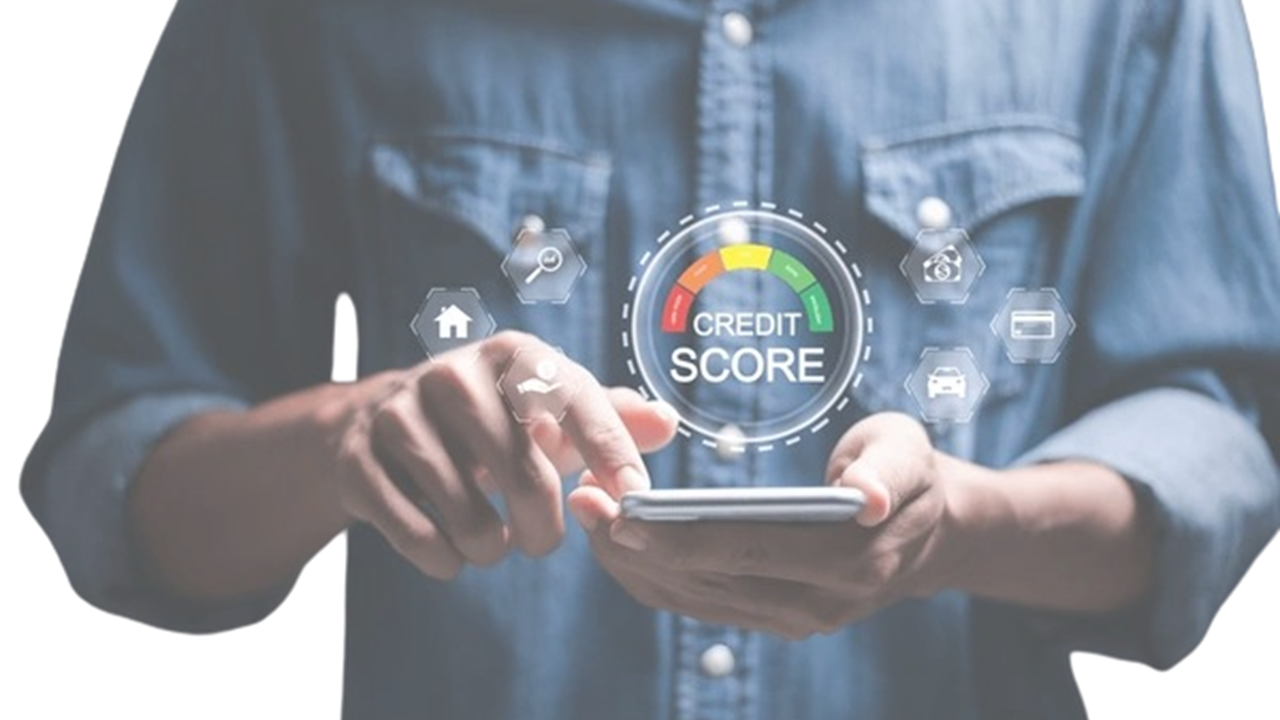

In [1]:
from IPython.display import display, Image
full_path = r'C:\Users\domingosdeeularia\...\CreditScorePrediction'
display(Image(full_path + '/CreditScoreCover.png'))

## Summary

This project aimed at developing a ML model for predicting the credit scores of customers of a global finance company. Credit scoring is critical for financial institutions as it helps them assess the creditworthiness of their customers. Below are listed the attributes considered for this task:

1. Customer_ID — ID of each customer (categorical: string);
2. Age — age of the customer (numerical: integer);
3. Occupation — occupation of the customer (categorical: string);
4. Annual_Income — annual income of the customer (numerical: float);
5. Monthly_Inhand_Salary — net salary of the customer (numerical: float);
6. Num_Bank_Accounts — number of bank accounts held by the customer (numerical: integer);
7. Num_Credit_Card — number of credit cards held by the customer (numerical: integer);
8. Interest_Rate — interest rate on credit card (numerical: float);
9. Num_of_Loan — number of loans taken by the customer (numerical: integer);
10. Delay_from_due_date — average number of days delayed from the payment due date (numerical: integer);
11. Num_of_Delayed_Payment — number of payments delayed (numerical: integer);
12. Changed_Credit_Limit — percentage change in credit card limit (numerical: float);
13. Num_Credit_Inquiries — number of credit card inquiries made by lenders on customers (numerical: integer);
14. Credit_Mix — ype of the mix of credits that the customer has (categorical: string);
15. Outstanding_Debt — remaining debt to be paid, in USD (numerical: float);
16. Credit_Utilization_Ratio — utilization ratio of credit card (numerical: float);
17. Credit_History_Age — age of credit history of the customer in months (numerical: integer);
18. Payment_of_Min_Amount — hether minimum amount was paid by the customer or not (categorical: string);
19. Total_EMI_per_month — monthly EMI (Equated Monthly Installment) payments, in USD (numerical: float);
20. Amount_invested_monthly — monthly amount invested by the customer, in USD (numerical: float);
21. Payment_Behaviour — payment behaviour of the customer (categorical: string);
22. Monthly_Balance — monthly balance amount of the customer, in USD (numerical: float);
23. Last_Loan_9 — latest loan taken (categorical: string);
24. Last_Loan_1 — ninth loan taken (categorical: string);
25. Credit_Score — credit score assigned to the customer for given month (categorical: string).

## Main Libraries

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
plt.style.use('ggplot')

# Preprocessing and training
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer, RobustScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import  XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# Function to retrieve candidate models evaluation metrics
from eval_models.eval_models import eval_class


# Ignoring warnings
from warnings import filterwarnings as fw
fw('ignore')

## Exploratory Data Analysis

In [3]:
# Importing the dataset

file = full_path + '/CreditScoreDataset.csv'
df = pd.read_csv(file)
df.head()

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Last_Loan_9,Last_Loan_8,Last_Loan_7,Last_Loan_6,Last_Loan_5,Last_Loan_4,Last_Loan_3,Last_Loan_2,Last_Loan_1,Credit_Score
0,CUS_0x98ed,31,Journalist,22229.060,1672.421667,6,4,5.0,3,10,...,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Debt Consolidation Loan,Home Equity Loan,Debt Consolidation Loan,Standard
1,CUS_0x36b4,43,Musician,17060.705,1685.725417,8,3,11.0,4,24,...,No Loan,No Loan,No Loan,No Loan,No Loan,Debt Consolidation Loan,Home Equity Loan,Auto Loan,Auto Loan,Standard
2,CUS_0x105b,24,Accountant,34428.210,2575.017500,2,4,8.0,0,3,...,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Good
3,CUS_0x4c4a,21,Accountant,12613.920,1155.160000,4,6,13.0,3,14,...,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Personal Loan,Student Loan,Home Equity Loan,Standard
4,CUS_0x612f,31,Journalist,34775.160,3048.930000,7,9,25.0,5,20,...,No Loan,No Loan,No Loan,No Loan,Auto Loan,Mortgage Loan,Auto Loan,Payday Loan,Not Specified,Poor


In [4]:
# Info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  int64  
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  int64  
 13  Credit_Mix                100000 non-null  ob

In [5]:
# Columns and dataframe for categorical attributes

cat_cols = df.dtypes[df.dtypes == 'object'].index
df_cat = df[cat_cols[1:]]
df_cat.head()

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Last_Loan_9,Last_Loan_8,Last_Loan_7,Last_Loan_6,Last_Loan_5,Last_Loan_4,Last_Loan_3,Last_Loan_2,Last_Loan_1,Credit_Score
0,Journalist,Standard,Yes,High_spent_Medium_value_payments,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Debt Consolidation Loan,Home Equity Loan,Debt Consolidation Loan,Standard
1,Musician,Standard,Yes,Low_spent_Small_value_payments,No Loan,No Loan,No Loan,No Loan,No Loan,Debt Consolidation Loan,Home Equity Loan,Auto Loan,Auto Loan,Standard
2,Accountant,Good,No,High_spent_Small_value_payments,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Good
3,Accountant,Standard,Yes,Low_spent_Medium_value_payments,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Personal Loan,Student Loan,Home Equity Loan,Standard
4,Journalist,Bad,Yes,High_spent_Medium_value_payments,No Loan,No Loan,No Loan,No Loan,Auto Loan,Mortgage Loan,Auto Loan,Payday Loan,Not Specified,Poor


In [6]:
df_cat.iloc[:, [0, 1, 2, 3, -1]]

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Journalist,Standard,Yes,High_spent_Medium_value_payments,Standard
1,Musician,Standard,Yes,Low_spent_Small_value_payments,Standard
2,Accountant,Good,No,High_spent_Small_value_payments,Good
3,Accountant,Standard,Yes,Low_spent_Medium_value_payments,Standard
4,Journalist,Bad,Yes,High_spent_Medium_value_payments,Poor
...,...,...,...,...,...
99995,Writer,Bad,Yes,High_spent_Small_value_payments,Poor
99996,Engineer,Good,No,High_spent_Large_value_payments,Standard
99997,Lawyer,Bad,Yes,Low_spent_Small_value_payments,Poor
99998,Lawyer,Standard,Yes,High_spent_Small_value_payments,Standard


In [7]:
# Columns and dataframe for numerical attributes

num_cols = df.dtypes[df.dtypes != 'object'].index
df_num = df[num_cols]
df_num.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,31,22229.060,1672.421667,6,4,5.0,3,10,10,9.44,9,1396.14,33.061861,156,52.138474,44.084010,321.019683
1,43,17060.705,1685.725417,8,3,11.0,4,24,8,9.64,2,268.81,36.377621,269,51.934634,39.628311,327.009597
2,24,34428.210,2575.017500,2,4,8.0,0,3,12,8.51,0,180.70,39.917508,326,0.000000,84.774645,432.727105
3,21,12613.920,1155.160000,4,6,13.0,3,14,17,17.51,3,569.11,39.841494,376,16.941903,41.943603,346.630494
4,31,34775.160,3048.930000,7,9,25.0,5,20,20,17.16,6,3003.45,36.058472,162,126.596814,67.970377,360.325808


In [8]:
# Statistical summary for numerical attributes

df_num.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.309240,50505.123449,4198.771859,5.368800,5.533640,14.53208,3.532880,21.068780,13.329240,10.389098,5.772820,1426.220376,32.285173,221.206880,88.209450,193.686347,403.492393
std,10.764996,38299.422093,3187.494345,2.593279,2.067073,8.74133,2.446356,14.860104,6.269066,6.783550,3.861137,1155.129026,5.116875,99.681112,83.244703,194.785222,214.423009
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,-5.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,1.000000,-1.000000,0.000000,0.007760
25%,24.000000,19342.972500,1626.761667,3.000000,4.000000,7.00000,2.000000,10.000000,9.000000,5.340000,3.000000,566.072500,28.052567,144.000000,25.589532,73.730625,270.322511
50%,33.000000,36999.705000,3096.378333,5.000000,5.000000,13.00000,3.000000,18.000000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,61.541296,129.361839,337.270985
75%,42.000000,71683.470000,5961.745000,7.000000,7.000000,20.00000,5.000000,28.000000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,131.528154,234.346249,471.928804
max,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,67.000000,28.000000,36.970000,17.000000,4998.070000,50.000000,404.000000,357.406068,1977.326102,1602.040519


In [9]:
# Creating a dataframe to plot some relevant numeric columns

df_num_to_plot = df.loc[:, ['Age',	'Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate', 'Credit_Score']]
num_cols_to_plot = df_num_to_plot.columns

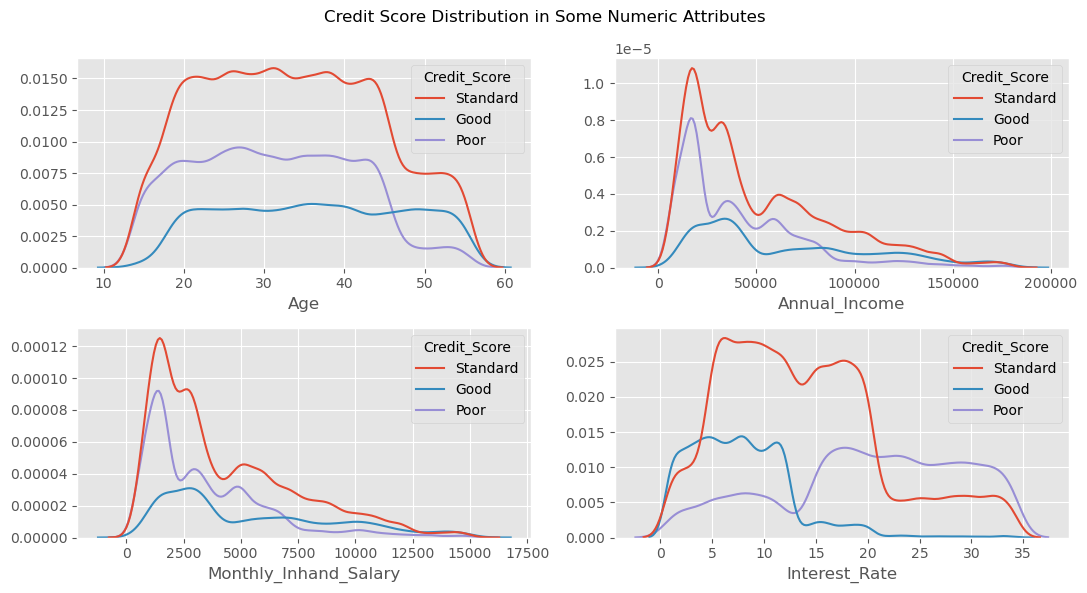

In [10]:
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (11, 6))

for i, ax in enumerate (fig.axes):
    sns.kdeplot(data = df_num_to_plot, x = num_cols_to_plot[i], hue = 'Credit_Score', ax = ax)
    ax.set_ylabel('')
plt.suptitle('Credit Score Distribution in Some Numeric Attributes')
plt.tight_layout()
plt.show()

In [11]:
# Statistical summary (categorical attributes)

df_cat.describe()

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Last_Loan_9,Last_Loan_8,Last_Loan_7,Last_Loan_6,Last_Loan_5,Last_Loan_4,Last_Loan_3,Last_Loan_2,Last_Loan_1,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,15,3,2,6,10,10,10,10,10,10,10,10,10,3
top,Lawyer,Standard,Yes,Low_spent_Small_value_payments,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Standard
freq,7096,45848,59432,36650,96144,92808,85128,76984,69456,54000,38248,22536,11408,53174


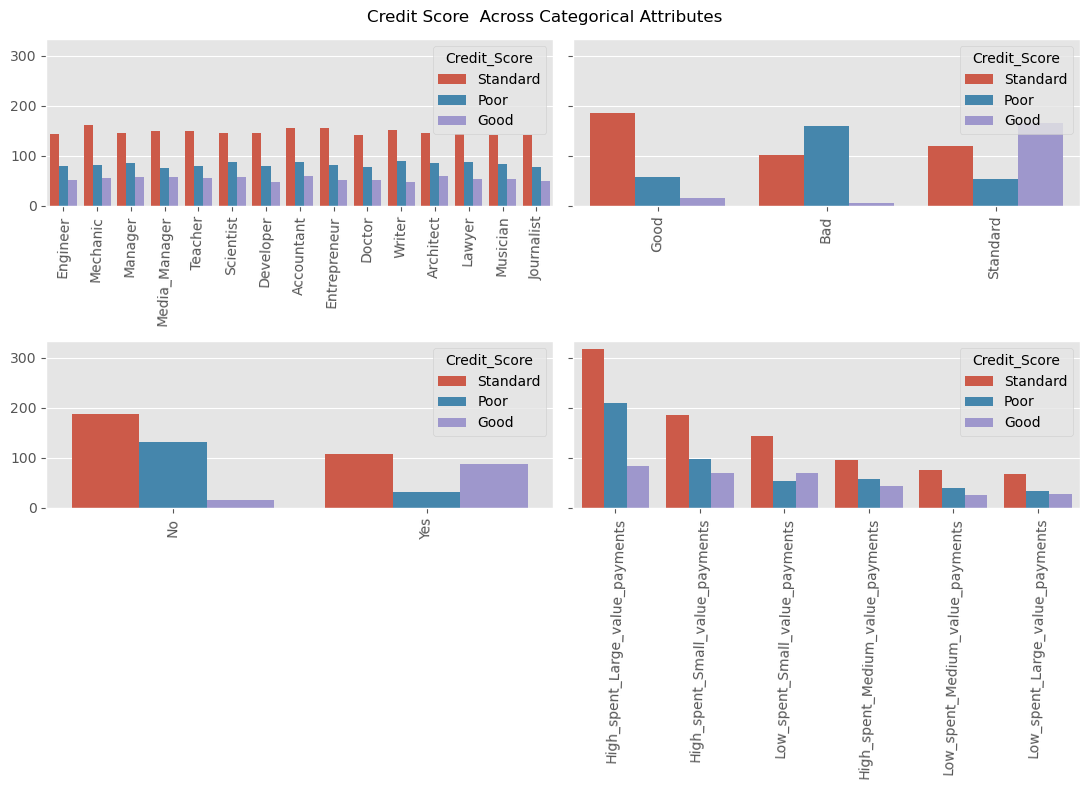

In [12]:
# Credit scores across categoricat attributes

fig, axes = plt.subplots(ncols = 2, nrows = 2, sharey = True, figsize = (11, 8))

grouped_cat = df_cat.iloc[:, [0, 1, 2, 3, -1]].value_counts().reset_index()

for i, ax in enumerate(axes.flatten()):
    sns.barplot(data = grouped_cat, x = cat_cols[i + 1], y = 'count', hue = 'Credit_Score', ax = ax, errorbar = None)
    ax.set_xticks(ticks = np.arange(len(set(df[cat_cols[i +1]]))), labels = set(df[cat_cols[i +1]]), rotation = 88)
    ax.set_ylabel('')
    ax.set_xlabel('')
plt.suptitle('Credit Score  Across Categorical Attributes')  
plt.tight_layout()
plt.show()

## Model Training

In [13]:
# We have seen in the kde plot that some ou our numeric data does not follow a normal distribution, we'll use robust 
# scaler to scale the numeric attributes to address the presence of possible significant aoutliers.

num_cols_scaled = RobustScaler().fit_transform(df[num_cols])
df_transf = df.copy()
df_transf[num_cols] = num_cols_scaled

In [14]:
# Target and predictors

X, y = df_transf.iloc[:, 1:-1], df_transf.Credit_Score
X_ohe = pd.get_dummies(X, drop_first = True)

In [15]:
# Dimensionality reduction to plot the distribution of classes

pca = PCA(n_components = 2)
X_scaled = StandardScaler().fit_transform(X_ohe)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns = ['Principal Component 1', 'Principal Component 2'])
df_pca [y.name] = y.values

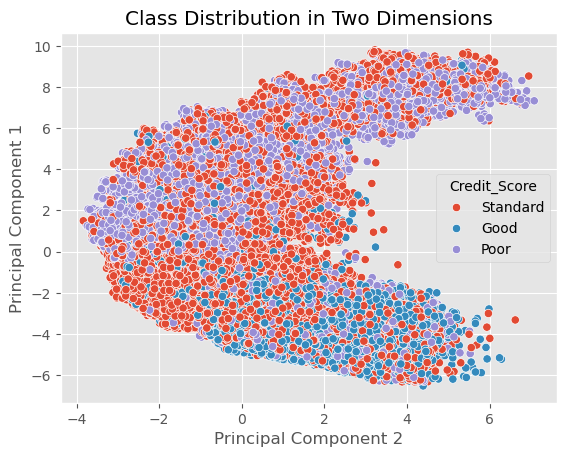

In [16]:
# Classes distribution for two principal predictors

sns.scatterplot(df_pca, x = 'Principal Component 2', y = 'Principal Component 1', hue = 'Credit_Score')
plt.title('Class Distribution in Two Dimensions')
plt.show()

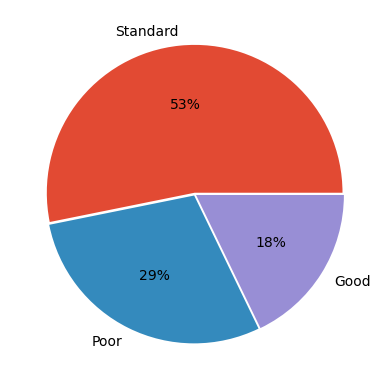

In [17]:
# Let's analyse the class balance in the target variable

df.Credit_Score.value_counts().plot.pie(autopct = '%.f%%', explode = (0.01, 0.01, 0.01))
plt.ylabel('')
plt.show()

In [18]:
# Oversampling to address class imbalance

seed = 7
adasyn = ADASYN(random_state = 7)
X_bal, y_bal = adasyn.fit_resample(X_ohe, y)

In [19]:
# Encoding the target variable

y_enc = LabelEncoder().fit_transform(y_bal)

In [20]:
# Splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_bal, y_enc, 
                                                    random_state = seed, test_size = 0.3)

In [21]:
# Candidate models

forest_clf, xgb_clf = RandomForestClassifier(random_state = seed), XGBClassifier(random_state = seed), 
tree_clf, log_reg = DecisionTreeClassifier(random_state = seed), LogisticRegression(random_state = seed)
candidate_models = {'Random Forest': forest_clf, 'XGB': xgb_clf, 
                    'Decision Tree': tree_clf, 'Logistic Regression': log_reg}

In [22]:
# scores of candidate models

scores, best_model_pipeline = eval_class(candidate_models, X_train, y_train)
scores

,Model,Mean Score (F1 Micro)
1,XGB,0.824164
0,Random Forest,0.648866
3,Logistic Regression,0.640841
2,Decision Tree,0.624793


In [23]:
# Pipeline of the winner model

best_model_pipeline

Pipeline(steps=[('pca', PCA(n_components=66)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=7, ...))])

In [24]:
# Fitting the best model and making predictions

model = best_model_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 2, 0, ..., 2, 2, 1], dtype=int64)

In [25]:
# Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83     15462
           1       0.83      0.82      0.83     16523
           2       0.78      0.67      0.72     15870

    accuracy                           0.80     47855
   macro avg       0.80      0.80      0.79     47855
weighted avg       0.80      0.80      0.79     47855



In [26]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[13860   223  1379]
 [ 1340 13499  1684]
 [ 2706  2465 10699]]


In [27]:
# Normalized confusion matrix

norm_conf_matrix = conf_matrix/conf_matrix.sum(axis = 1)[:, np.newaxis]
norm_conf_matrix

array([[0.89639115, 0.01442246, 0.08918639],
       [0.08109907, 0.81698239, 0.10191854],
       [0.1705104 , 0.15532451, 0.67416509]])

In [28]:
# Probability predictions

y_pred_prb = model.predict_proba(X_test)

In [29]:
# Binarization of target variable (true and predicted values)

y_bin_test, y_bin_pred = LabelBinarizer().fit_transform(y_test), LabelBinarizer().fit_transform(y_pred)

In [30]:
# Receiver Operating Characteristic Area Under the Curve:

roc_auc_micro = roc_auc_score(y_bin_test, y_pred_prb, average = 'micro')
roc_auc_micro 

0.9246200508774498

In [31]:
# FPR and TPR at different thresholds

FPR, TPR = dict(), dict()
FPR['Micro'], TPR['Micro'], _ = roc_curve(y_bin_test.flatten(), y_pred_prb.flatten())

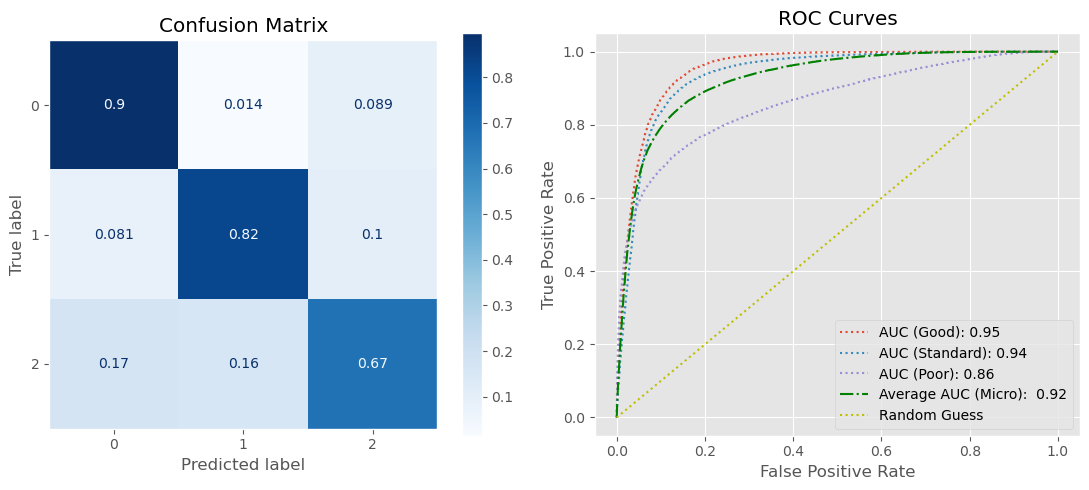

In [32]:

fig, axs = plt.subplots(ncols = 2, figsize = (11, 5))


ConfusionMatrixDisplay(norm_conf_matrix).plot(cmap = 'Blues', ax = axs [0])
axs[0].grid(False)
axs[0].set_title('Confusion Matrix')

classes = set(y)

fpr, tpr = dict(), dict()

for i, class_ in enumerate(classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin_test[:, i], y_pred_prb[:, i])
    auc_score_class = roc_auc_score(y_bin_test[:, i], y_pred_prb[:, i])
    axs[1].plot(fpr[i], tpr[i], linestyle = ':', label = f'AUC ({class_}): {auc_score_class:.2f}')
axs[1].plot(FPR['Micro'], TPR['Micro'], 'g-.', label = f'Average AUC (Micro): {roc_auc_micro: .2f}')
axs[1].plot([0, 1], [0, 1], 'y:', label = 'Random Guess')
axs[1].legend()
axs[1].set_ylabel('True Positive Rate')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_title('ROC Curves')
plt.tight_layout()
plt.show()

##  Data Provenance

<p>
  <strong>Source:</strong> 
  Ayush Sharma (Kaggle) 
  <a href = 'https://www.kaggle.com/datasets/ayushsharma0812/dataset-for-credit-score-classification' target = '_blank'>
    Dataset for Credit Score Classification.
  </a>
  <br>
  <strong>License:</strong>
    <a href = 'https://creativecommons.org/publicdomain/zero/1.0/' target = '_blank'>
        CC0: Public Domain.
    </a>
    <br><br>
  <em>Last accessed on October, 21 2024.</em>
</p>

                 ________  ________   _______   ______
                 /_  __/ / / / ____/  / ____/ | / / __ \
                  / / / /_/ / __/    / __/ /  |/ / / / /
                 / / / __  / /___   / /___/ /|  / /_/ /
                /_/ /_/ /_/_____/  /_____/_/ |_/_____/  
